<a href="https://colab.research.google.com/github/alessandranerylima/data_science/blob/main/Exploratory_Data_Analysis_in_Python_Language_for_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 1- Understanding Data

In [5]:
# Loading o dataset
df = pd.read_csv('/content/dataset.csv')

In [6]:
# Shape
df.shape

(9700, 11)

In [7]:
# Columns of the data set
df.columns

Index(['ID_Order', 'Date_Order', 'ID_Customer', 'Segment', 'Country', 'City',
       'State', 'ID_Product', 'Category', 'SubCategory', 'Sales_Value'],
      dtype='object')

In [8]:
# Checking the data type of each column
df.dtypes

ID_Order        object
Date_Order      object
ID_Customer     object
Segment         object
Country         object
City            object
State           object
ID_Product      object
Category        object
SubCategory     object
Sales_Value    float64
dtype: object

In [9]:
# Statistical summary of the sales value column
df['Sales_Value'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Sales_Value, dtype: float64

In [10]:
# checking for duplicate records
df[df.duplicated()]

,ID_Order,Date_Order,ID_Customer,Segment,Country,City,State,ID_Product,Category,SubCategory,Sales_Value


In [11]:
# checking if there are missing values
df.isnull().sum()

ID_Order       0
Date_Order     0
ID_Customer    0
Segment        0
Country        0
City           0
State          0
ID_Product     0
Category       0
SubCategory    0
Sales_Value    0
dtype: int64

In [12]:
df.head()

,ID_Order,Date_Order,ID_Customer,Segment,Country,City,State,ID_Product,Category,SubCategory,Sales_Value
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Question of Business 1:

###  Which City Has The Highest Sales Value for Office Supplies?

In [13]:
#First we filter the dataframe with the records of the category we want
data=df[df['Category']=='Office Supplies']

In [14]:
#Then we group by city and calculate the total value
data1=data.groupby('City')['Sales_Value'].sum()

In [15]:
##So we found the city with the highest sales value# To check the result
city= data1.idxmax()
print('"Highest selling city for Office Supplies: ',city)

"Highest selling city for Office Supplies:  New York City


In [16]:
# To check the result
data2=data1.sort_values(ascending=False)
data2

City
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Sales_Value, Length: 480, dtype: float64

## Question of Business 2:

### What is the Total Sales By Order Date?

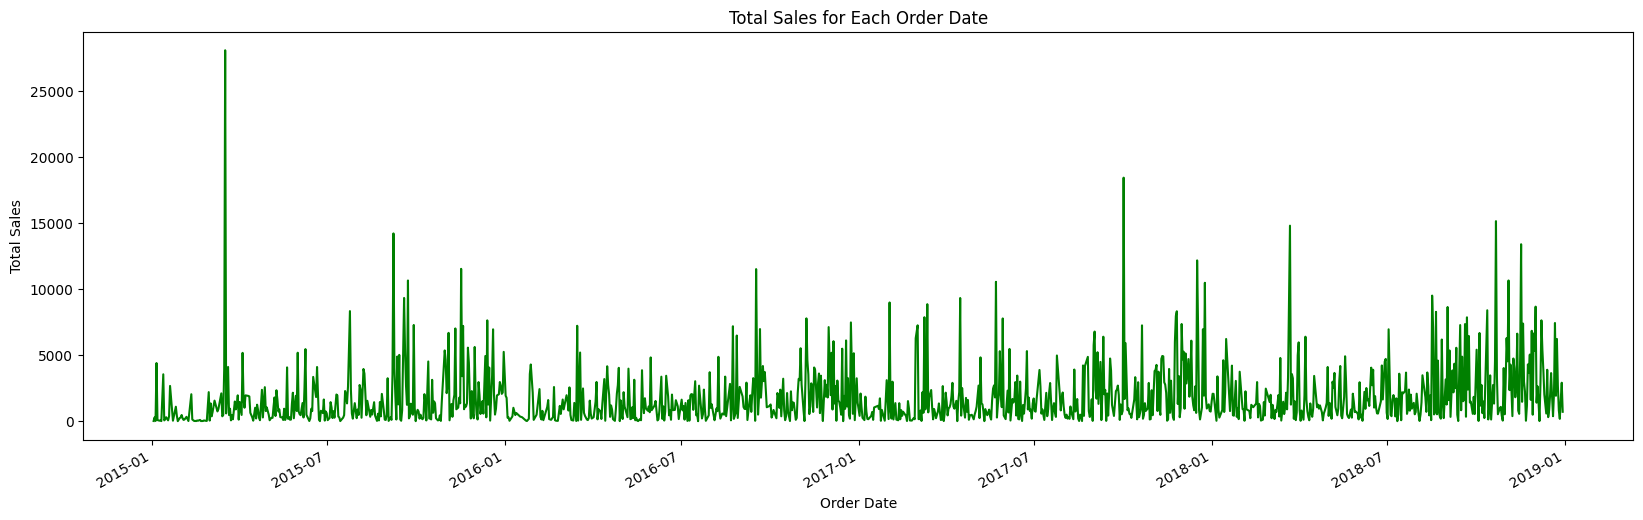

In [17]:
#Converting the 'Data_Pedido' Column to the type datetime
df['Date_Order'] = pd.to_datetime(df['Date_Order'], format='%d/%m/%Y')

#Sorting the dataframe by date to ensure data is in chronological order
df.sort_values(by='Date_Order', inplace=True)

# We calculate the total sales for each order date
df_p2 = df.groupby('Date_Order')['Sales_Value'].sum()

# Plot
plt.figure(figsize=(20, 6))
df_p2.plot(color='green')
plt.title('Total Sales for Each Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

## Question Business 3:

###  What is the Total Sales By State?

In [18]:
# We group by state and calculate total sales
# 'reset_index' to reorder the index once a new slice of the data frame has been created
df_p3 = df.groupby('State')['Sales_Value'].sum().reset_index()

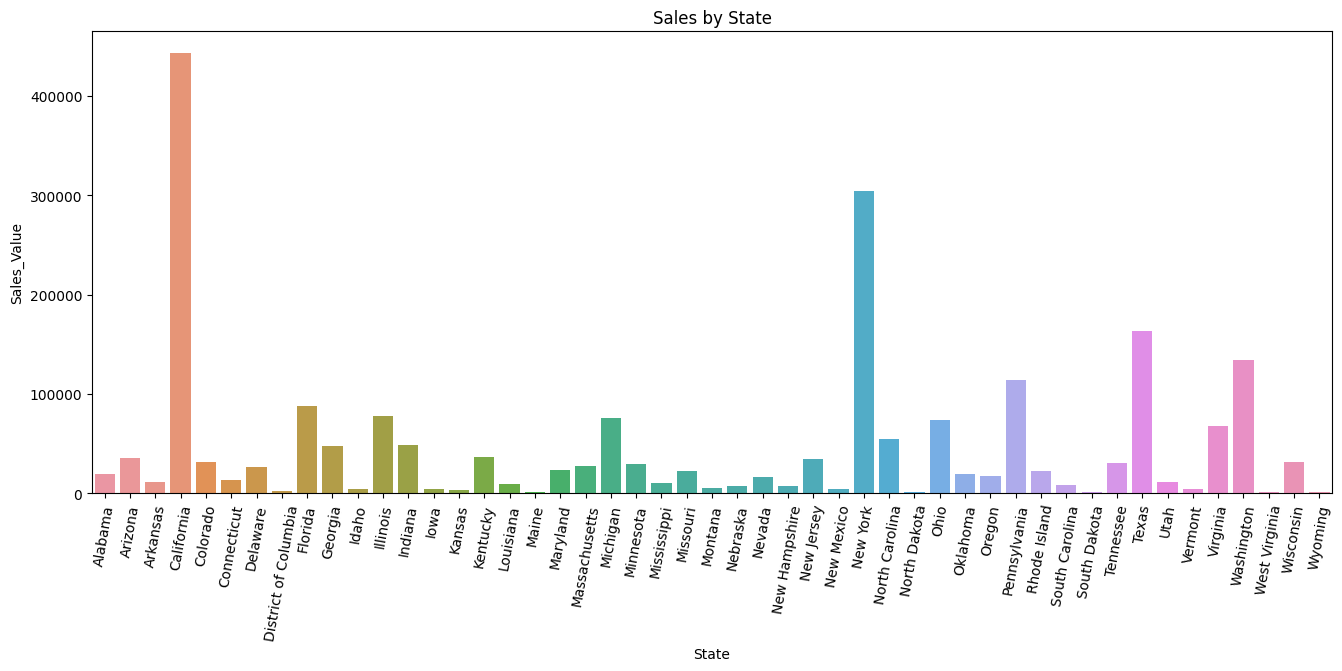

In [19]:
# Plot
plt.figure(figsize = (16, 6)) # Call the plt.figure() function to create a new figure
sns.barplot(data = df_p3,
            y = 'Sales_Value',
            x = 'State').set(title = 'Sales by State')
plt.xticks(rotation = 80)
plt.show()

## Question Business 4:

### Which 10 Cities Have the Highest Total Sales?

In [20]:
# Grouping by city, calculate total sales and sort by listing only the first 10 records
# Using 'reset_index' to reorder data frame

df_p4= df.groupby('City')['Sales_Value'].sum().reset_index().sort_values(by ='Sales_Value',ascending=False).head(10)

In [21]:
df_p4.head(10)

,City,Sales_Value
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


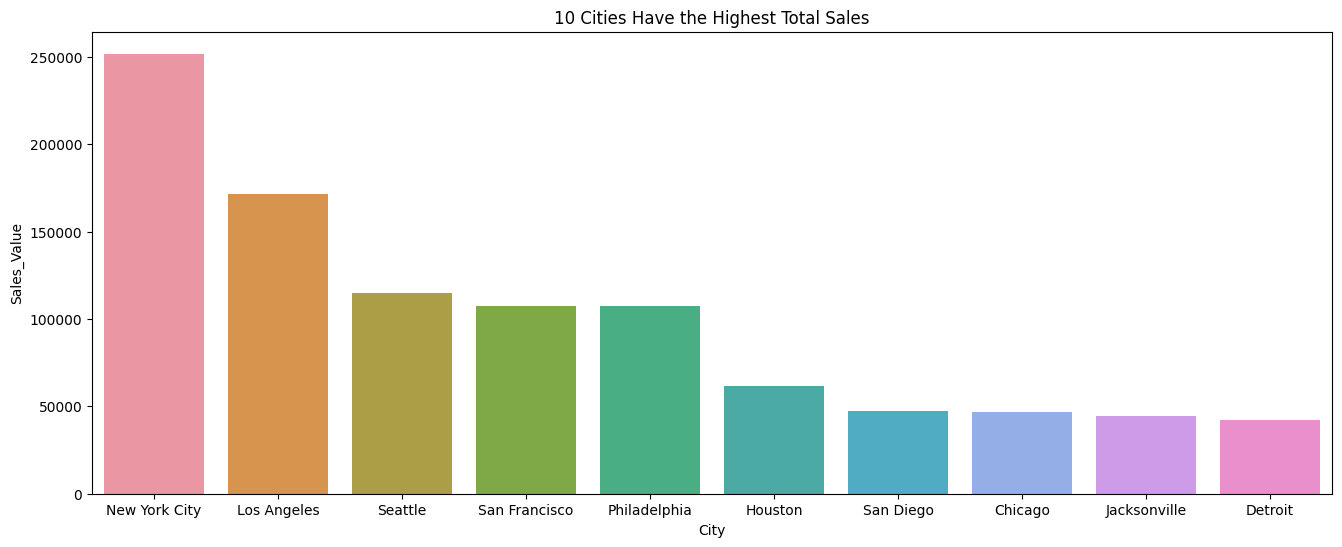

In [22]:
#Plot

plt.figure(figsize=(16, 6))  # Call the plt.figure() function to create a new figure
sns.set_palette('coolwarm')
sns.barplot(data=df_p4, y='Sales_Value', x='City').set(title='10 Cities Have the Highest Total Sales')
plt.show()

## Question Business 5:

### Which Segment Have the Highest Total Sales?

In [23]:
df_p5= df.groupby('Segment')['Sales_Value'].sum().reset_index().sort_values(by ='Sales_Value',ascending=False).head(10)

In [24]:
df_p5.head(10)

,Segment,Sales_Value
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [25]:
# Function to coverter data from Value Sale column ( Pandas' standard scientific notation) for absolute value
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

<function matplotlib.pyplot.show(close=None, block=None)>

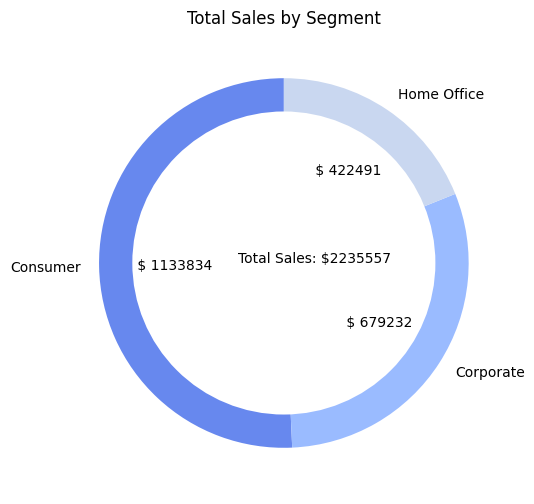

In [26]:
#Plot

#Size of figure
plt.figure(figsize = (16,6))

#Pie chart
plt.pie(df_p5['Sales_Value'],
        labels=df_p5['Segment'],
        autopct = autopct_format(df_p5['Sales_Value']),  # Using the custom formatting function
        startangle = 90)

#Cleaing central circle
centre_circle = plt.Circle((0,0),0.82,fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels and notation
plt.annotate(text = 'Total Sales: ' + '$' + str(int(sum(df_p5['Sales_Value']))), xy = (-0.25,0))
plt.title ('Total Sales by Segment')
plt.show

## Question Business 6:

### Which  Total Sales by Segment and by Year?

In [27]:
#  Extract the year from the "Date" column and create the "Year" column
df['Year'] = df['Date_Order'].dt.year

# Display the resulting dataframe
df

,ID_Order,Date_Order,ID_Customer,Segment,Country,City,State,ID_Product,Category,SubCategory,Sales_Value,Year
7977,CA-2015-103800,2015-01-03,DP-13000,Consumer,United States,Houston,Texas,OFF-PA-10000174,Office Supplies,Paper,16.448,2015
739,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-LA-10003223,Office Supplies,Labels,11.784,2015
740,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-ST-10002743,Office Supplies,Storage,272.736,2015
741,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-BI-10004094,Office Supplies,Binders,3.540,2015
1759,CA-2015-141817,2015-01-05,MB-18085,Consumer,United States,Philadelphia,Pennsylvania,OFF-AR-10003478,Office Supplies,Art,19.536,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
908,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,OFF-BI-10003684,Office Supplies,Binders,52.776,2018
906,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,FUR-BO-10003441,Furniture,Bookcases,323.136,2018
907,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,TEC-PH-10004774,Technology,Phones,90.930,2018
1297,CA-2018-115427,2018-12-30,EB-13975,Corporate,United States,Fairfield,California,OFF-BI-10004632,Office Supplies,Binders,20.720,2018


In [28]:
#Grouping total sales by year and segment
data =df[['Year','Segment','Sales_Value']].groupby(['Segment','Year']).agg(['sum'])
data

Sales_Value
                          sum
Segment     Year             
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

## Question Business 7 :

The managers of the company are considering granting different discount ranges and would like to make a simulation based on the rule below:

- If the Valor_Venda is greater than 1000 you receive 15% discount.
- If the Valor_Venda is less than 1000 you receive 10% discount.

### How Many Sales Would Receive 15% Discount?

In [29]:
#Creating a new column according to the discount rules established by managers
df ["Discount"]=np.where(df['Sales_Value'] > 1000,0.15,0.10)
# Display the resulting dataframe
df

,ID_Order,Date_Order,ID_Customer,Segment,Country,City,State,ID_Product,Category,SubCategory,Sales_Value,Year,Discount
7977,CA-2015-103800,2015-01-03,DP-13000,Consumer,United States,Houston,Texas,OFF-PA-10000174,Office Supplies,Paper,16.448,2015,0.1
739,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-LA-10003223,Office Supplies,Labels,11.784,2015,0.1
740,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-ST-10002743,Office Supplies,Storage,272.736,2015,0.1
741,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-BI-10004094,Office Supplies,Binders,3.540,2015,0.1
1759,CA-2015-141817,2015-01-05,MB-18085,Consumer,United States,Philadelphia,Pennsylvania,OFF-AR-10003478,Office Supplies,Art,19.536,2015,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,OFF-BI-10003684,Office Supplies,Binders,52.776,2018,0.1
906,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,FUR-BO-10003441,Furniture,Bookcases,323.136,2018,0.1
907,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,TEC-PH-10004774,Technology,Phones,90.930,2018,0.1
1297,CA-2018-115427,2018-12-30,EB-13975,Corporate,United States,Fairfield,California,OFF-BI-10004632,Office Supplies,Binders,20.720,2018,0.1


In [30]:
# Total sales by each discount value
d1=df['Discount'].value_counts()
d1

0.10    9243
0.15     457
Name: Discount, dtype: int64

## Question Business 8 :

### Whereas the company decides to grant the 15% Discount,  what would be the Average Sale Value Before and After the Discount?

In [31]:
# Creating a new column - calculating Sales Value less discount
df['Sales_Value_Discount']= df['Sales_Value']-df['Sales_Value']*df['Discount']

In [32]:
df.head()

,ID_Order,Date_Order,ID_Customer,Segment,Country,City,State,ID_Product,Category,SubCategory,Sales_Value,Year,Discount,Sales_Value_Discount
7977,CA-2015-103800,2015-01-03,DP-13000,Consumer,United States,Houston,Texas,OFF-PA-10000174,Office Supplies,Paper,16.448,2015,0.1,14.8032
739,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-LA-10003223,Office Supplies,Labels,11.784,2015,0.1,10.6056
740,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-ST-10002743,Office Supplies,Storage,272.736,2015,0.1,245.4624
741,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-BI-10004094,Office Supplies,Binders,3.540,2015,0.1,3.1860
1759,CA-2015-141817,2015-01-05,MB-18085,Consumer,United States,Philadelphia,Pennsylvania,OFF-AR-10003478,Office Supplies,Art,19.536,2015,0.1,17.5824


In [33]:
#Filtering Sales_Value before 15% Discount (Slicing data frame)
df_p6_before_Discount= df.loc[df['Discount']==0.15,'Sales_Value']

In [34]:
#Filtering Sales_Value after 15% Discount (Slicing data frame)
df_p6_after_Discount= df.loc[df['Discount']==0.15,'Sales_Value_Discount']

In [35]:
# Calculating average Sales before 15% Discount
average_before = df_p6_before_Discount.mean()

In [36]:
# Calculating average Sales after 15% Discount
average_after = df_p6_after_Discount.mean()

In [37]:
print( 'The average Salues Value before 15% of Discount é: ', round(average_before,2))
print( 'The average Salues Value after 15% of Discount é: ', round(average_after,2))

The average Salues Value before 15% of Discount é:  2116.81
The average Salues Value after 15% of Discount é:  1799.29


## Question Business 9 :

### What is the Average Sales by Segment,  Year and  Month?

In [38]:
# Extracting "month" and recorcording in a new variable
df['Month'] = df['Date_Order'].dt.month

# Dsiplay data frame
df

,ID_Order,Date_Order,ID_Customer,Segment,Country,City,State,ID_Product,Category,SubCategory,Sales_Value,Year,Discount,Sales_Value_Discount,Month
7977,CA-2015-103800,2015-01-03,DP-13000,Consumer,United States,Houston,Texas,OFF-PA-10000174,Office Supplies,Paper,16.448,2015,0.1,14.8032,1
739,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-LA-10003223,Office Supplies,Labels,11.784,2015,0.1,10.6056,1
740,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-ST-10002743,Office Supplies,Storage,272.736,2015,0.1,245.4624,1
741,CA-2015-112326,2015-01-04,PO-19195,Home Office,United States,Naperville,Illinois,OFF-BI-10004094,Office Supplies,Binders,3.540,2015,0.1,3.1860,1
1759,CA-2015-141817,2015-01-05,MB-18085,Consumer,United States,Philadelphia,Pennsylvania,OFF-AR-10003478,Office Supplies,Art,19.536,2015,0.1,17.5824,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,OFF-BI-10003684,Office Supplies,Binders,52.776,2018,0.1,47.4984,12
906,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,FUR-BO-10003441,Furniture,Bookcases,323.136,2018,0.1,290.8224,12
907,CA-2018-143259,2018-12-30,PO-18865,Consumer,United States,New York City,New York,TEC-PH-10004774,Technology,Phones,90.930,2018,0.1,81.8370,12
1297,CA-2018-115427,2018-12-30,EB-13975,Corporate,United States,Fairfield,California,OFF-BI-10004632,Office Supplies,Binders,20.720,2018,0.1,18.6480,12


In [39]:
# Grouping by year, month and year and calculating aggregation statistics
df_p7 =df.groupby(['Year','Month','Segment'])['Sales_Value'].agg([np.sum,np.mean,np.median])
df_p7

sum        mean  median
Year Month Segment                                    
2015 1     Consumer      6896.6290  146.736787  36.440
           Corporate     1701.5280  130.886769  51.940
           Home Office   5607.5500  329.855882  62.820
     2     Consumer      3167.8540  117.327926  22.776
           Corporate      623.1180   69.235333  62.310
...                            ...         ...     ...
2018 11    Corporate    44357.9862  341.215278  79.530
           Home Office  24009.3840  247.519423  56.560
     12    Consumer     48107.4558  183.616244  52.533
           Corporate    20524.4320  153.167403  46.460
           Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [40]:
# Extracting levels
year = df_p7.index.get_level_values(0)
month = df_p7.index.get_level_values(1)
segment =df_p7.index.get_level_values(2)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

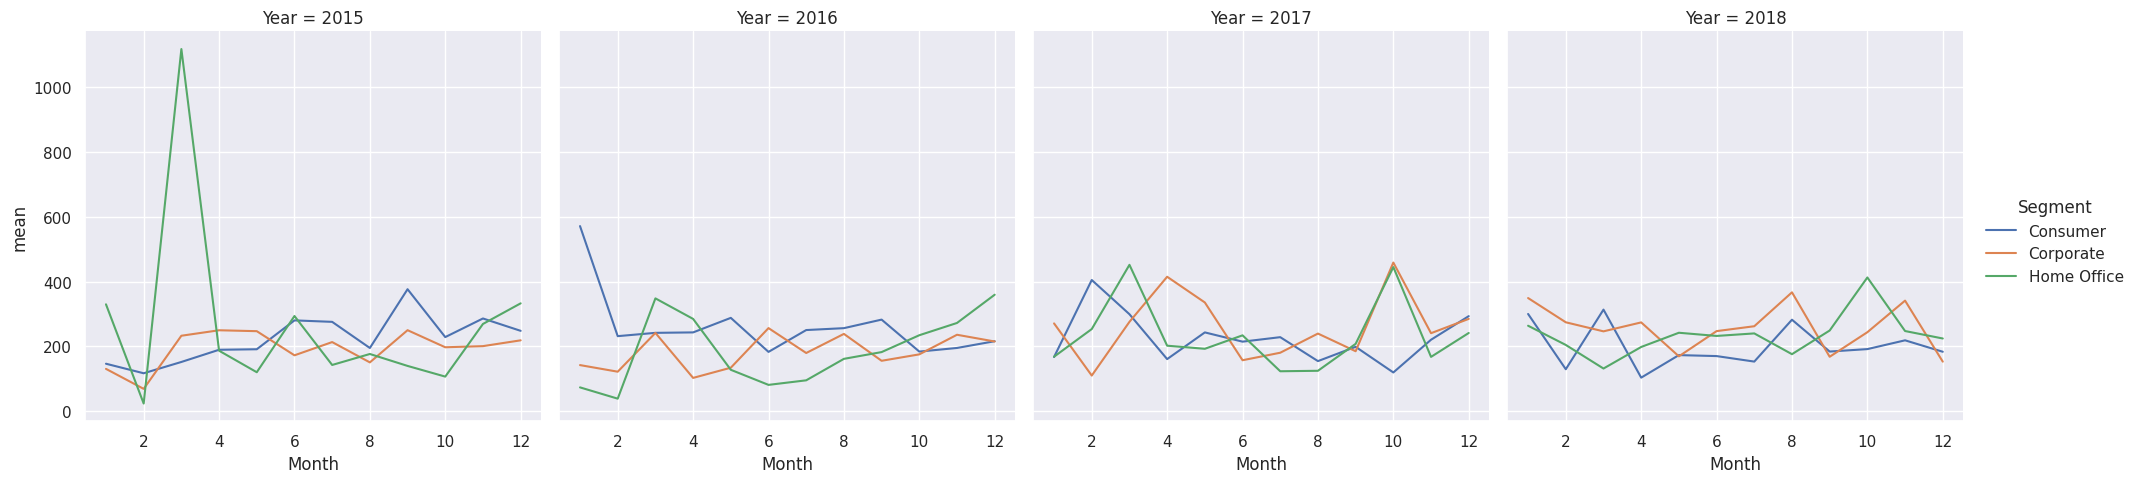

In [41]:
#Plot
plt.figure(figsize = (12,6))
sns.set() # to clean the set_palette('coolwarm') did before
fig1 = sns.relplot(kind ='line',
                  data = df_p7,
                  y = 'mean',
                  x= month,
                  hue = segment,
                  col = year,
                  col_wrap = 4)
plt.show

## Question Business 10:

### What is the Total Sales By Category and Subcategory, Considering Only the top 12  subcategories?

In [42]:
#Grouping by category and subcategory and calculate the sum only for number variable - that the value sale column
df_p10 = df.groupby(['Category','SubCategory']).sum(numeric_only=True).sort_values('Sales_Value', ascending=False).head(12)

In [43]:
#Converting the Value Sale column to full value and sorting by category
df_p10 = df_p10[['Sales_Value']].astype(int).sort_values(by = 'Category').reset_index()

In [44]:
#Sorting the above item by category is important for filling out the chart with subcategories
#for each category in an orderly fashion.

In [45]:
#Display data frame with categry and subcategory
df_p10

,Category,SubCategory,Sales_Value
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [46]:
# Creating a new data frame only total of category
df_p10_cat = df_p10.groupby('Category').sum(numeric_only=True).reset_index()

In [47]:
#Display data set with Category
df_p10_cat

,Category,Sales_Value
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [48]:
# Creating color lists for Category
category_colors = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [49]:
# Creating color lists for SubCategory
subcategory_colors = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

<function matplotlib.pyplot.show(close=None, block=None)>

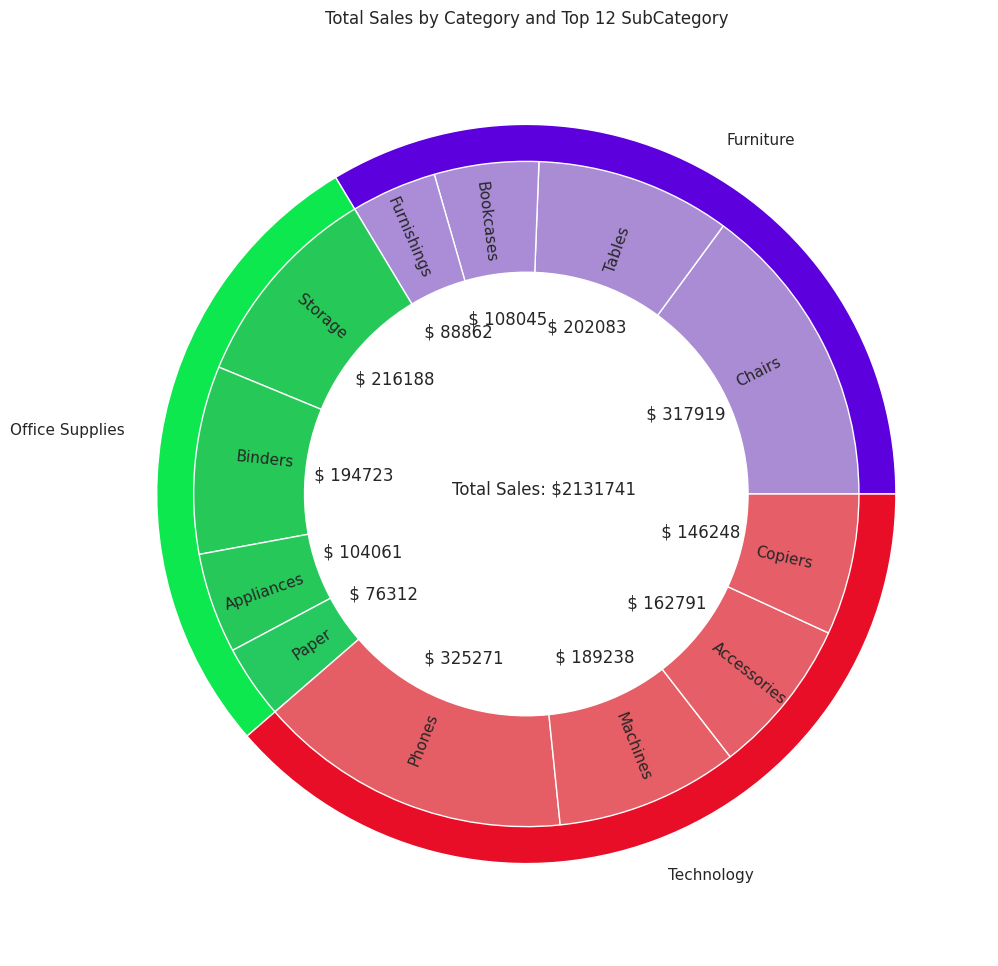

In [50]:
#Plot

# Picture size
fig, ax = plt.subplots(figsize = (18,12))

# Category chart
p1 = ax.pie(df_p10_cat['Sales_Value'],
           radius = 1,
           labels = df_p10_cat ['Category'],
           wedgeprops = dict(edgecolor = 'white'),
           colors = category_colors)

# SubCategory chart
p2 = ax.pie(df_p10['Sales_Value'],
           radius = 0.9,
           labels = df_p10['SubCategory'],
           autopct = autopct_format(df_p10['Sales_Value']),
           colors = subcategory_colors,
           labeldistance = 0.7,
           wedgeprops = dict(edgecolor = 'white'),
           pctdistance = 0.53,
           rotatelabels = True)

#clears the center of the circle
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels and notation
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total Sales: ' + '$' + str(int(sum(df_p10['Sales_Value']))), xy = (-0.2,0))
plt.title('Total Sales by Category and Top 12 SubCategory')
plt.show

# The End